# Пятая лабораторная работа

In [2]:
import thinkdsp as td
import numpy as np
import matplotlib.pyplot as plt

## Задача 1.
Оценить высоты тона вокального чирпа с помощью приложения из примера.

In [3]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [4]:
vocal = td.read_wave('wavs/28042__bcjordan__voicedownbew.wav')
vocal.normalize()
vocal.make_audio()

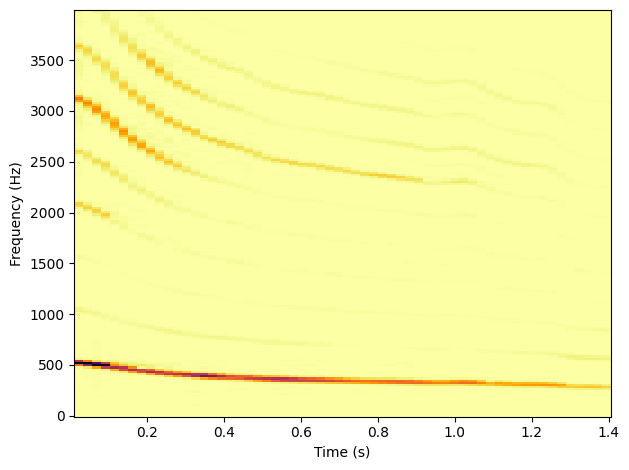

In [5]:
vocal.make_spectrogram(2048).plot(high=4000)
td.decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

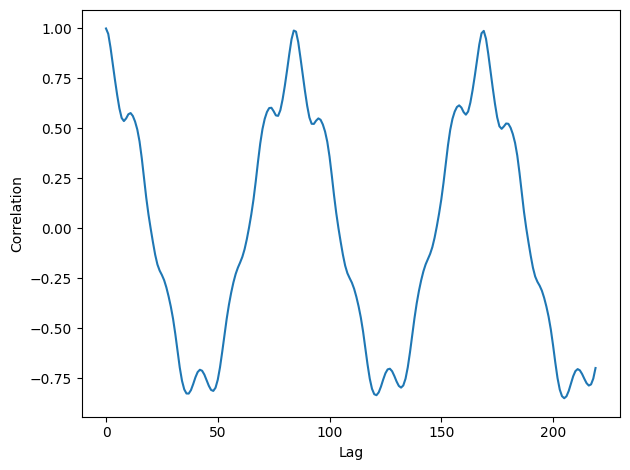

In [6]:
segment = vocal.segment(start=0.0, duration=0.01)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
td.decorate(xlabel='Lag', ylabel='Correlation')

In [7]:
lag = lags[corrs.index(max(corrs[50:100]))]
period = lag / segment.framerate
frequency = 1 / period
print(f'lag: {lag}\nfrequency: {frequency:.2f} Hz')

lag: 84
frequency: 525.00 Hz


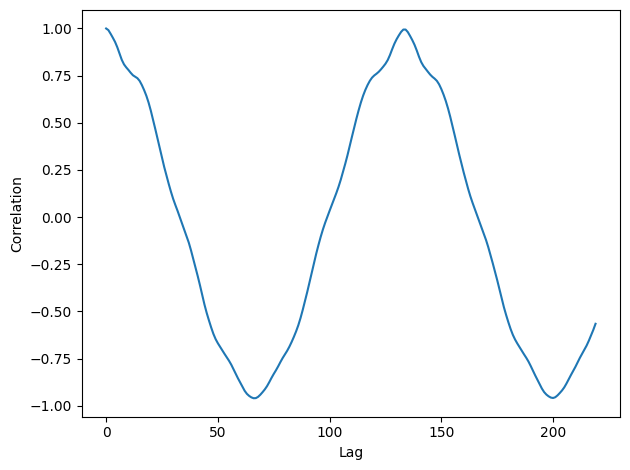

In [8]:
segment = vocal.segment(start=1.0, duration=0.01)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
td.decorate(xlabel='Lag', ylabel='Correlation')

In [9]:
lag = lags[corrs.index(max(corrs[50:100]))]
period = lag / segment.framerate
frequency = 1 / period
print(f'lag: {lag}\nfrequency: {frequency:.2f} Hz')

lag: 99
frequency: 445.45 Hz


## Задача 2.
Инкапсулировать код автокорреляции в функцию `estimate_fundamental`. Использовать её для отслеживания высоты тона записанного звука. Проверить работу.

In [10]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [11]:
glissando_wave = td.read_wave("wavs/rhapblue11924_64kb.wav").segment(6, 10)
glissando_wave.make_audio()

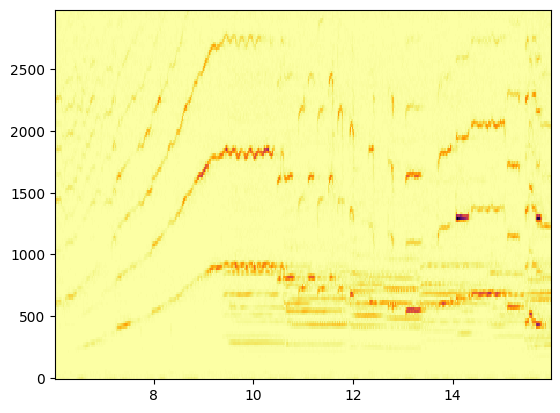

In [12]:
glissando_wave.make_spectrogram(512).plot(high=3000)

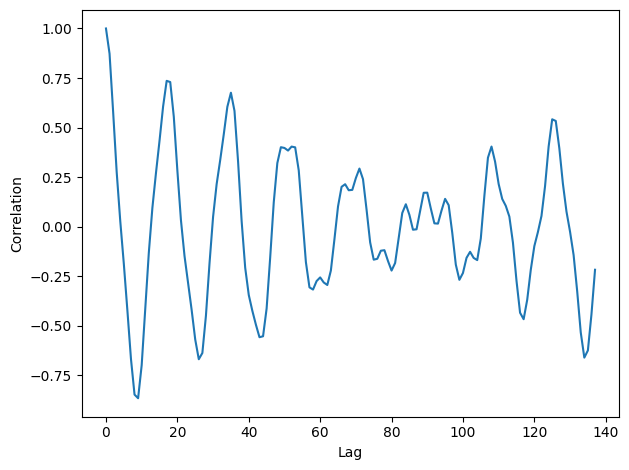

In [13]:
segment = glissando_wave.segment(start=14, duration=0.025)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
td.decorate(xlabel='Lag', ylabel='Correlation')

In [14]:
estimate_fundamental(segment, 15, 30)

648.5294117647059

Получим 648 Гц. Значение совпадает с частотой в заданном участе на спектрограмме.

## Задача 3.
Используя предыдущие данные о курсе БитКоина, вычислить автокорреляции цен. Оценить спад функции. Оценить периодичность.

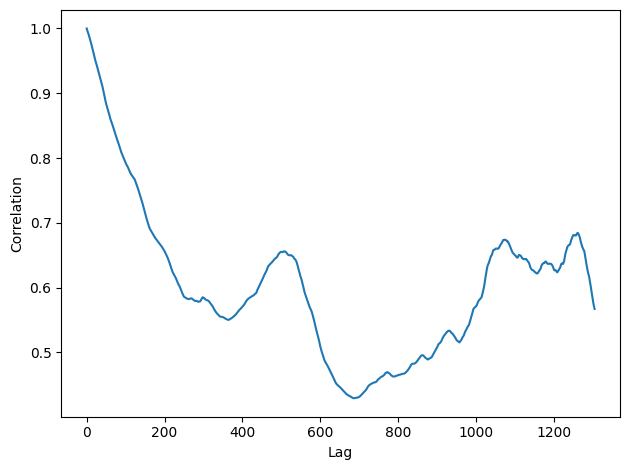

In [16]:
import pandas as pd
bitcoin_info = pd.read_csv('wavs/Bitcoin_Price.csv')
bitcoin_wave = td.Wave(ys=bitcoin_info['Closing Price (USD)'], ts=bitcoin_info.index, framerate=1)
lags, corrs = autocorr(bitcoin_wave)
plt.plot(lags, corrs)
td.decorate(xlabel='Lag', ylabel='Correlation')

Данный график цен показывает лишь некое подобие периодичности, но ни коим образом не говорит о строгой периодичности.

## Задача 4.
Поработать с примерами из блокнота `saxophone.ipynb`

In [43]:
saxophone = td.read_wave('wavs/100475__iluppai__saxophone-weep.wav')
saxophone.normalize()
saxophone.make_audio()

In [44]:
segment = saxophone.segment(start=8.0, duration=0.5)
segment.make_audio()

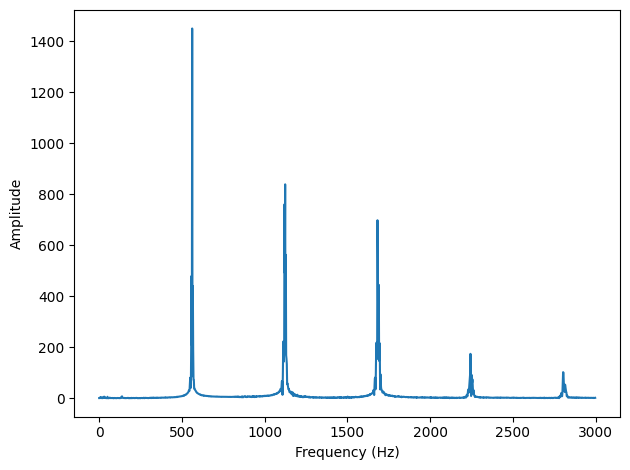

In [45]:
spectrum = segment.make_spectrum()
spectrum.plot(high=3000)
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

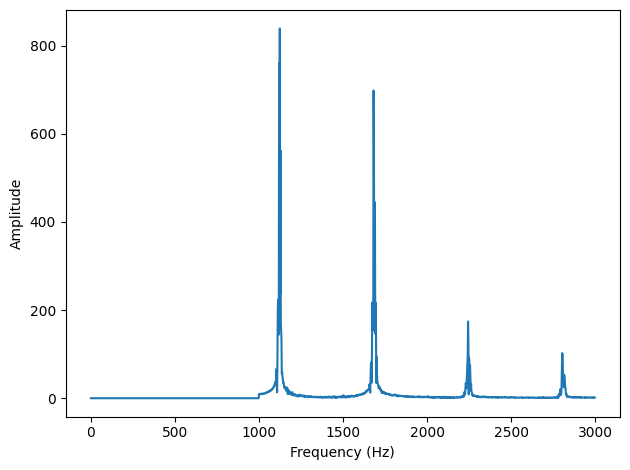

In [46]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(1000)
spectrum2.plot(high=3000)
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [47]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

Даже после фильтрации первой гармоники, слышна та же нота, что и раньше.

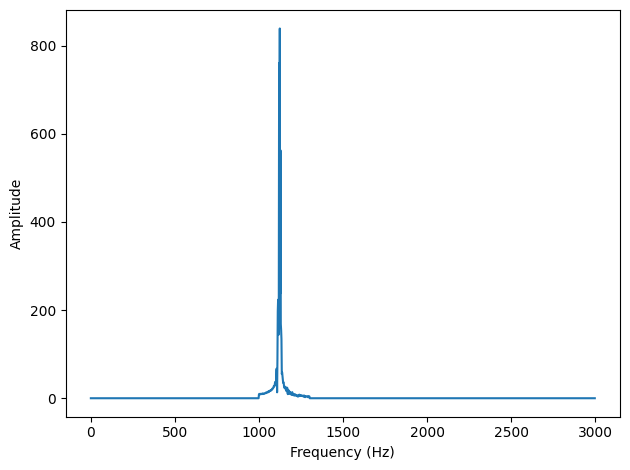

In [50]:
spectrum3 = segment.make_spectrum()
spectrum3.high_pass(1000)
spectrum3.low_pass(1300)
spectrum3.plot(high=3000)
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [49]:
segment3 = spectrum3.make_wave()
segment3.make_audio()